In [3]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('shaunak_08').getOrCreate()

In [4]:
ds = spark.read.load("./2018.csv", format="csv", header="true")

In [5]:
ds

DataFrame[Overall rank: string, Country or region: string, Score: string, GDP per capita: string, Social support: string, Healthy life expectancy: string, Freedom to make life choices: string, Generosity: string, Perceptions of corruption: string]

In [6]:
ds.show()

+------------+--------------------+-----+--------------+--------------+-----------------------+----------------------------+----------+-------------------------+
|Overall rank|   Country or region|Score|GDP per capita|Social support|Healthy life expectancy|Freedom to make life choices|Generosity|Perceptions of corruption|
+------------+--------------------+-----+--------------+--------------+-----------------------+----------------------------+----------+-------------------------+
|           1|             Finland|7.632|         1.305|         1.592|                  0.874|                       0.681|     0.202|                    0.393|
|           2|              Norway|7.594|         1.456|         1.582|                  0.861|                       0.686|     0.286|                    0.340|
|           3|             Denmark|7.555|         1.351|         1.590|                  0.868|                       0.683|     0.284|                    0.408|
|           4|             I

In [7]:
ds.count()

156

In [8]:
ds.columns

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [9]:
ds.describe().show() 

+-------+-----------------+-----------------+-----------------+-------------------+------------------+-----------------------+----------------------------+-------------------+-------------------------+
|summary|     Overall rank|Country or region|            Score|     GDP per capita|    Social support|Healthy life expectancy|Freedom to make life choices|         Generosity|Perceptions of corruption|
+-------+-----------------+-----------------+-----------------+-------------------+------------------+-----------------------+----------------------------+-------------------+-------------------------+
|  count|              156|              156|              156|                156|               156|                    156|                         156|                156|                      156|
|   mean|             78.5|             null|5.375916666666668| 0.8914487179487178|1.2132371794871797|     0.5973461538461537|          0.4545064102564102| 0.1810064102564103|      0.112000000

In [10]:
ds.show()

+------------+--------------------+-----+--------------+--------------+-----------------------+----------------------------+----------+-------------------------+
|Overall rank|   Country or region|Score|GDP per capita|Social support|Healthy life expectancy|Freedom to make life choices|Generosity|Perceptions of corruption|
+------------+--------------------+-----+--------------+--------------+-----------------------+----------------------------+----------+-------------------------+
|           1|             Finland|7.632|         1.305|         1.592|                  0.874|                       0.681|     0.202|                    0.393|
|           2|              Norway|7.594|         1.456|         1.582|                  0.861|                       0.686|     0.286|                    0.340|
|           3|             Denmark|7.555|         1.351|         1.590|                  0.868|                       0.683|     0.284|                    0.408|
|           4|             I

In [11]:
ds.count()

156

In [12]:
ds.describe().show()

+-------+-----------------+-----------------+-----------------+-------------------+------------------+-----------------------+----------------------------+-------------------+-------------------------+
|summary|     Overall rank|Country or region|            Score|     GDP per capita|    Social support|Healthy life expectancy|Freedom to make life choices|         Generosity|Perceptions of corruption|
+-------+-----------------+-----------------+-----------------+-------------------+------------------+-----------------------+----------------------------+-------------------+-------------------------+
|  count|              156|              156|              156|                156|               156|                    156|                         156|                156|                      156|
|   mean|             78.5|             null|5.375916666666668| 0.8914487179487178|1.2132371794871797|     0.5973461538461537|          0.4545064102564102| 0.1810064102564103|      0.112000000

In [13]:
from pyspark.sql.functions import *
ds = ds.withColumn('Perceptions of corruption', regexp_replace('Perceptions of corruption','N/A', '0'))

In [14]:
ds.show()

+------------+--------------------+-----+--------------+--------------+-----------------------+----------------------------+----------+-------------------------+
|Overall rank|   Country or region|Score|GDP per capita|Social support|Healthy life expectancy|Freedom to make life choices|Generosity|Perceptions of corruption|
+------------+--------------------+-----+--------------+--------------+-----------------------+----------------------------+----------+-------------------------+
|           1|             Finland|7.632|         1.305|         1.592|                  0.874|                       0.681|     0.202|                    0.393|
|           2|              Norway|7.594|         1.456|         1.582|                  0.861|                       0.686|     0.286|                    0.340|
|           3|             Denmark|7.555|         1.351|         1.590|                  0.868|                       0.683|     0.284|                    0.408|
|           4|             I

In [15]:
ds.printSchema()

root
 |-- Overall rank: string (nullable = true)
 |-- Country or region: string (nullable = true)
 |-- Score: string (nullable = true)
 |-- GDP per capita: string (nullable = true)
 |-- Social support: string (nullable = true)
 |-- Healthy life expectancy: string (nullable = true)
 |-- Freedom to make life choices: string (nullable = true)
 |-- Generosity: string (nullable = true)
 |-- Perceptions of corruption: string (nullable = true)



In [16]:
ds.show()

+------------+--------------------+-----+--------------+--------------+-----------------------+----------------------------+----------+-------------------------+
|Overall rank|   Country or region|Score|GDP per capita|Social support|Healthy life expectancy|Freedom to make life choices|Generosity|Perceptions of corruption|
+------------+--------------------+-----+--------------+--------------+-----------------------+----------------------------+----------+-------------------------+
|           1|             Finland|7.632|         1.305|         1.592|                  0.874|                       0.681|     0.202|                    0.393|
|           2|              Norway|7.594|         1.456|         1.582|                  0.861|                       0.686|     0.286|                    0.340|
|           3|             Denmark|7.555|         1.351|         1.590|                  0.868|                       0.683|     0.284|                    0.408|
|           4|             I

In [17]:
ds = ds.drop("Generosity")

In [18]:
ds.show()

+------------+--------------------+-----+--------------+--------------+-----------------------+----------------------------+-------------------------+
|Overall rank|   Country or region|Score|GDP per capita|Social support|Healthy life expectancy|Freedom to make life choices|Perceptions of corruption|
+------------+--------------------+-----+--------------+--------------+-----------------------+----------------------------+-------------------------+
|           1|             Finland|7.632|         1.305|         1.592|                  0.874|                       0.681|                    0.393|
|           2|              Norway|7.594|         1.456|         1.582|                  0.861|                       0.686|                    0.340|
|           3|             Denmark|7.555|         1.351|         1.590|                  0.868|                       0.683|                    0.408|
|           4|             Iceland|7.495|         1.343|         1.644|                  0.914

In [19]:
df1 = ds

In [20]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

In [21]:
df1.show()

+------------+--------------------+-----+--------------+--------------+-----------------------+----------------------------+-------------------------+
|Overall rank|   Country or region|Score|GDP per capita|Social support|Healthy life expectancy|Freedom to make life choices|Perceptions of corruption|
+------------+--------------------+-----+--------------+--------------+-----------------------+----------------------------+-------------------------+
|           1|             Finland|7.632|         1.305|         1.592|                  0.874|                       0.681|                    0.393|
|           2|              Norway|7.594|         1.456|         1.582|                  0.861|                       0.686|                    0.340|
|           3|             Denmark|7.555|         1.351|         1.590|                  0.868|                       0.683|                    0.408|
|           4|             Iceland|7.495|         1.343|         1.644|                  0.914

In [22]:
from pyspark.sql.types import DataType, FloatType

In [23]:
df1 = df1.drop("Country or region")

In [24]:
df1 = df1.withColumn("Overall rank", ds["Overall rank"].cast(FloatType()))
df1 = df1.withColumn("Score", ds["Score"].cast(FloatType()))
df1 = df1.withColumn("GDP per capita", ds["GDP per capita"].cast(FloatType()))
df1 = df1.withColumn("Social support", ds["Social support"].cast(FloatType()))
df1 = df1.withColumn("Healthy life expectancy", ds["Healthy life expectancy"].cast(FloatType()))
df1 = df1.withColumn("Freedom to make life choices", ds["Freedom to make life choices"].cast(FloatType()))
df1 = df1.withColumn("Perceptions of corruption", ds["Perceptions of corruption"].cast(FloatType()))

In [25]:
df1.show()

+------------+-----+--------------+--------------+-----------------------+----------------------------+-------------------------+
|Overall rank|Score|GDP per capita|Social support|Healthy life expectancy|Freedom to make life choices|Perceptions of corruption|
+------------+-----+--------------+--------------+-----------------------+----------------------------+-------------------------+
|         1.0|7.632|         1.305|         1.592|                  0.874|                       0.681|                    0.393|
|         2.0|7.594|         1.456|         1.582|                  0.861|                       0.686|                     0.34|
|         3.0|7.555|         1.351|          1.59|                  0.868|                       0.683|                    0.408|
|         4.0|7.495|         1.343|         1.644|                  0.914|                       0.677|                    0.138|
|         5.0|7.487|          1.42|         1.549|                  0.927|                

In [26]:
df1.printSchema()

root
 |-- Overall rank: float (nullable = true)
 |-- Score: float (nullable = true)
 |-- GDP per capita: float (nullable = true)
 |-- Social support: float (nullable = true)
 |-- Healthy life expectancy: float (nullable = true)
 |-- Freedom to make life choices: float (nullable = true)
 |-- Perceptions of corruption: float (nullable = true)



In [27]:
df1.columns

['Overall rank',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Perceptions of corruption']

In [43]:
assembler = VectorAssembler(inputCols=["GDP per capita", "Healthy life expectancy","Score","Social support"], outputCol = "features")

In [44]:
data = assembler.transform(df1)

In [45]:
data.show()

+------------+-----+--------------+--------------+-----------------------+----------------------------+-------------------------+--------------------+
|Overall rank|Score|GDP per capita|Social support|Healthy life expectancy|Freedom to make life choices|Perceptions of corruption|            features|
+------------+-----+--------------+--------------+-----------------------+----------------------------+-------------------------+--------------------+
|         1.0|7.632|         1.305|         1.592|                  0.874|                       0.681|                    0.393|[1.30499994754791...|
|         2.0|7.594|         1.456|         1.582|                  0.861|                       0.686|                     0.34|[1.45599997043609...|
|         3.0|7.555|         1.351|          1.59|                  0.868|                       0.683|                    0.408|[1.35099995136260...|
|         4.0|7.495|         1.343|         1.644|                  0.914|                    

In [46]:
data.columns

['Overall rank',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Perceptions of corruption',
 'features']

In [47]:
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k=3, seed=1)  # 3 clusters here
model = kmeans.fit(data.select('features'))

In [48]:
centers = model.clusterCenters()

In [49]:
for i in centers:
    print(i)

[0.99085715 0.68066667 5.60847619 1.32725397]
[1.30419444 0.83511111 6.86238888 1.45558332]
[0.52089474 0.35508772 4.18005261 0.9341579 ]


In [50]:
transformed = model.transform(data)
transformed.show()   

+------------+-----+--------------+--------------+-----------------------+----------------------------+-------------------------+--------------------+----------+
|Overall rank|Score|GDP per capita|Social support|Healthy life expectancy|Freedom to make life choices|Perceptions of corruption|            features|prediction|
+------------+-----+--------------+--------------+-----------------------+----------------------------+-------------------------+--------------------+----------+
|         1.0|7.632|         1.305|         1.592|                  0.874|                       0.681|                    0.393|[1.30499994754791...|         1|
|         2.0|7.594|         1.456|         1.582|                  0.861|                       0.686|                     0.34|[1.45599997043609...|         1|
|         3.0|7.555|         1.351|          1.59|                  0.868|                       0.683|                    0.408|[1.35099995136260...|         1|
|         4.0|7.495|        

In [51]:
import pandas
pred = transformed.toPandas().set_index('Overall rank')
pred.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,features,prediction
Overall rank,,,,,,,,
1.0,7.632,1.305,1.592,0.874,0.681,0.393,"[1.3049999475479126, 0.8740000128746033, 7.631...",1
2.0,7.594,1.456,1.582,0.861,0.686,0.340,"[1.4559999704360962, 0.8610000014305115, 7.593...",1
3.0,7.555,1.351,1.590,0.868,0.683,0.408,"[1.3509999513626099, 0.8679999709129333, 7.554...",1
4.0,7.495,1.343,1.644,0.914,0.677,0.138,"[1.343000054359436, 0.9139999747276306, 7.4949...",1
5.0,7.487,1.420,1.549,0.927,0.660,0.357,"[1.4199999570846558, 0.9269999861717224, 7.486...",1


In [52]:
pred

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,features,prediction
Overall rank,,,,,,,,
1.0,7.632,1.305,1.592,0.874,0.681,0.393,"[1.3049999475479126, 0.8740000128746033, 7.631...",1
2.0,7.594,1.456,1.582,0.861,0.686,0.340,"[1.4559999704360962, 0.8610000014305115, 7.593...",1
3.0,7.555,1.351,1.590,0.868,0.683,0.408,"[1.3509999513626099, 0.8679999709129333, 7.554...",1
4.0,7.495,1.343,1.644,0.914,0.677,0.138,"[1.343000054359436, 0.9139999747276306, 7.4949...",1
5.0,7.487,1.420,1.549,0.927,0.660,0.357,"[1.4199999570846558, 0.9269999861717224, 7.486...",1
6.0,7.441,1.361,1.488,0.878,0.638,0.295,"[1.3609999418258667, 0.878000020980835, 7.4409...",1
7.0,7.328,1.330,1.532,0.896,0.653,0.291,"[1.3300000429153442, 0.8960000276565552, 7.328...",1
8.0,7.324,1.268,1.601,0.876,0.669,0.389,"[1.2680000066757202, 0.8759999871253967, 7.323...",1
9.0,7.314,1.355,1.501,0.913,0.659,0.383,"[1.3550000190734863, 0.9129999876022339, 7.314...",1


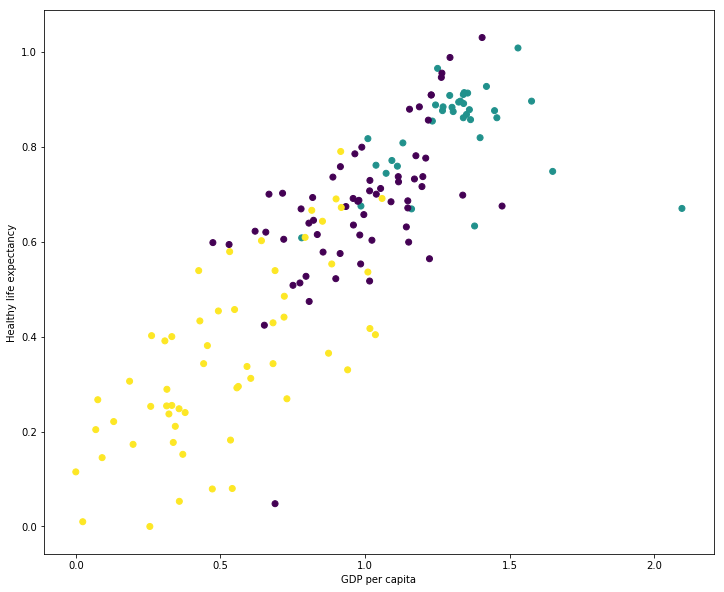

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(pred['GDP per capita'], pred['Healthy life expectancy'], c=pred.prediction)
plt.xlabel('GDP per capita')
plt.ylabel('Healthy life expectancy')
plt.show()

(array([63.,  0.,  0.,  0.,  0., 36.,  0.,  0.,  0., 57.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

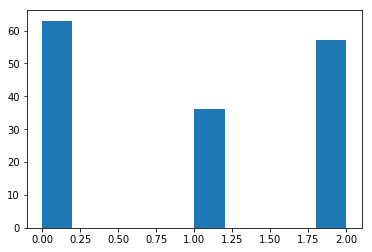

In [54]:
plt.hist(pred.prediction)

([<matplotlib.patches.Wedge at 0x7f613e223710>,
 [Text(1.09976,0.0230367,''),
  Text(1.09783,0.0690696,''),
  Text(1.09397,0.114981,''),
  Text(1.0882,0.160691,''),
  Text(1.08052,0.206119,''),
  Text(1.07094,0.251186,''),
  Text(1.05948,0.295812,''),
  Text(1.04616,0.339919,''),
  Text(1.03101,0.383429,''),
  Text(1.01405,0.426267,''),
  Text(0.99531,0.468357,''),
  Text(0.974824,0.509626,''),
  Text(0.952628,0.55,''),
  Text(0.928761,0.589409,''),
  Text(0.903264,0.627785,''),
  Text(0.876183,0.665059,''),
  Text(0.847565,0.701166,''),
  Text(0.817459,0.736044,''),
  Text(0.78592,0.76963,''),
  Text(0.753002,0.801866,''),
  Text(0.718763,0.832695,''),
  Text(0.683263,0.862063,''),
  Text(0.646564,0.889919,''),
  Text(0.608731,0.916213,''),
  Text(0.56983,0.940901,''),
  Text(0.529929,0.963937,''),
  Text(0.489099,0.985283,''),
  Text(0.44741,1.0049,''),
  Text(0.404937,1.02275,''),
  Text(0.361753,1.03881,''),
  Text(0.317935,1.05305,''),
  Text(0.273559,1.06544,''),
  Text(0.228703,

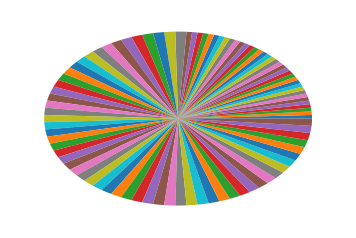

In [55]:
plt.pie(pred.prediction)